In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target_names[iris.target]

In [17]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [18]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


In [21]:
# Logistic Regression (One-vs-Rest)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [22]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [23]:
import re

def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)

    handles, labels = scatter.legend_elements()
    labels = [f"Class {re.search(r'\d+', label).group()}" if re.search(r'\d+', label) else label
          for label in labels]

    plt.legend(handles, labels, title="Classes")

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.grid(True)
    plt.show()

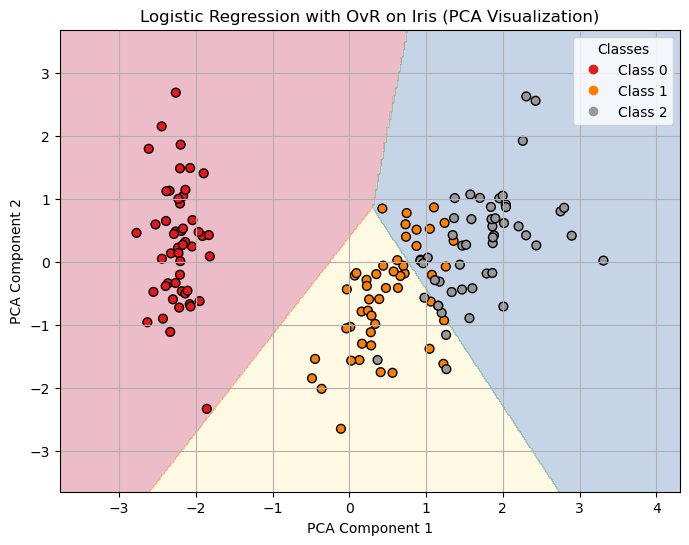

In [24]:
plot_decision_boundaries(X_pca, y_encoded, model, "Logistic Regression with OvR on Iris (PCA Visualization)")